<a href="https://colab.research.google.com/github/sahay-46/AML/blob/main/Lab1_2348545.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing dataframe
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Program_1_Dataset.csv')
data.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [ ]:
#checking for null values
data.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

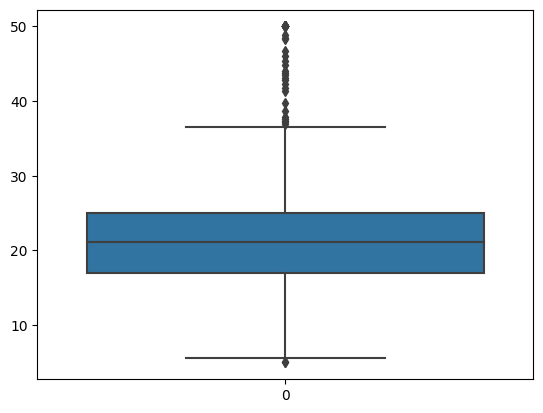

<Axes: >

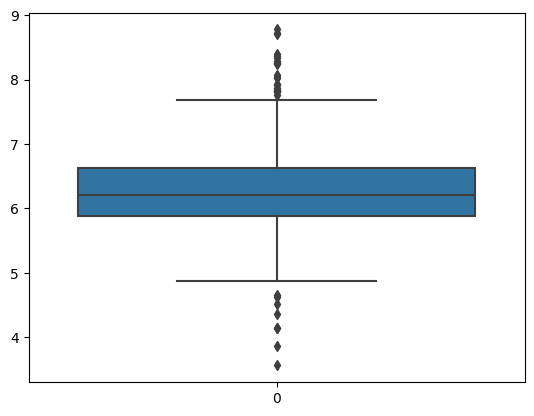

In [ ]:
#checking for outliers
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data['MValue'])
plt.show()
sns.boxplot(data['Avg_rooms '])

In [ ]:
#handling outliers
import numpy as np
from scipy import stats
def drop_outlier(data,col_name):
  print(data.shape)
  z = np.abs(stats.zscore(col_name))
  data.drop(data.index[np.where(abs(z)>2.5)],inplace=True)
  print("New data shape post deletion: "+str(data.shape))
drop_outlier(data,data['MValue'])
drop_outlier(data,data['Avg_rooms '])

(506, 14)
New data shape post deletion: (485, 14)
(485, 14)
New data shape post deletion: (470, 14)


In [ ]:
#assigning X and Y for simple linear regression
x=data['Avg_rooms ']
y=data['MValue']
mean=y.mean()
mean

21.14170212765957

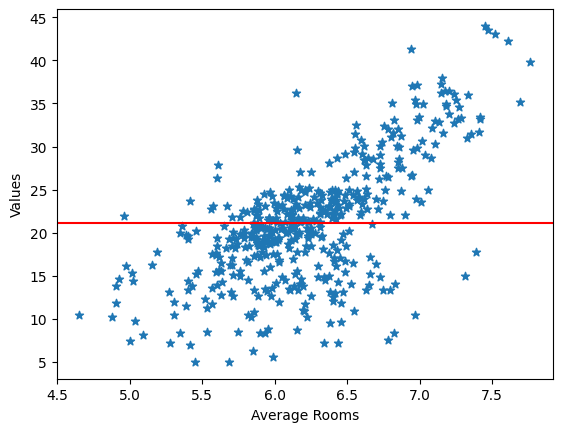

In [ ]:
#plotting X&Y with mean
plt.scatter(x,y,marker='*')
plt.axhline(y=mean,color='red')
plt.annotate("Value",xy=(1,mean+2.5))
plt.xlabel("Average Rooms")
plt.ylabel("Values")
plt.show()

In [ ]:
#splitting data for training and testing in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3,random_state=2)

In [ ]:
#creating seperate dataframes for training and testing
Training=pd.DataFrame(list(zip(X_train,Y_train)),columns=['Avg_rooms ','MValue'])
Testing=pd.DataFrame(list(zip(X_test,Y_test)),columns=['Avg_rooms ','MValue'])

In [ ]:
#Calculating intercept and coefficient
x=Training['Avg_rooms ']
y=Training['MValue']
xy=x*y
n=len(Training)
xmean=x.mean()
ymean=y.mean()
numerator=xy.sum()-n*xmean*ymean
denominator=(x**2).sum()-n*(xmean**2)
m=numerator/denominator
c=ymean-(m*xmean)
print('Intercept:',c,'Coefficient:',m)

Intercept: -33.1038001980001 Coefficient: 8.720211365741271


In [ ]:
#predicting the value and error
best_fit=c+m*Training['Avg_rooms ']
Training['best']=best_fit
Training['error']=Training['best']-Training['MValue']
Training['mean']=Training['MValue'].mean()
Training.head()

,Avg_rooms,MValue,best,error,mean
0,6.549,27.1,24.004864,-3.095136,21.142249
1,6.209,21.4,21.039992,-0.360008,21.142249
2,5.747,8.5,17.011255,8.511255,21.142249
3,6.431,18.0,22.975879,4.975879,21.142249
4,6.142,15.2,20.455738,5.255738,21.142249


Text(0.5, 1.0, 'Best Fit Model')

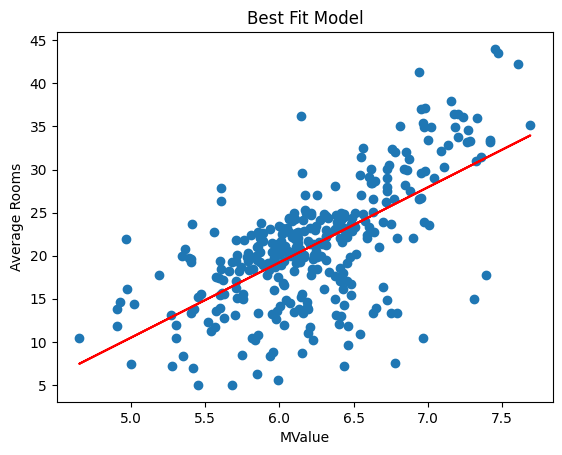

In [ ]:
#plotting the linear regression line
fig,ax=plt.subplots()
ax.scatter(x='Avg_rooms ',y='MValue',data=Training)
ax.plot(Training['Avg_rooms '],Training['best'],color='red')
ax.set_ylabel('Average Rooms')
ax.set_xlabel('MValue')
ax.set_title("Best Fit Model")

In [ ]:
#Finding the Sum of squares total
SST=sum((Training['mean']-Training['MValue'])**2)
SST

16766.82273556231

In [ ]:
#Finding the Sum of Square Error
SSE=sum(Training['error']**2)
SSE

9648.993788128788

In [ ]:
#Finding sum of squares due to regression
SSR=SST-SSE
SSR

7117.8289474335215

In [ ]:
#Calculating the R2 score
RSQ=SSR/SST
RSQ

0.4245186496984105

In [ ]:
#Finding the Mean square error
MSE=SSE/len(Training)
MSE

29.328248596136135

In [ ]:
#Using the same coefficient and intercept, predicitng values for Test dataframe
best_fit=c+m*Testing['Avg_rooms ']
Testing['best']=best_fit
Testing['error']=Testing['best']-Testing['MValue']
Testing['mean']=Testing['MValue'].mean()
Testing.head()

,Avg_rooms,MValue,best,error,mean
0,6.426,23.8,22.932278,-0.867722,21.140426
1,6.657,17.2,24.946647,7.746647,21.140426
2,6.127,23.9,20.324935,-3.575065,21.140426
3,5.874,20.3,18.118721,-2.181279,21.140426
4,6.398,25.0,22.688112,-2.311888,21.140426


Text(0.5, 1.0, 'Best Fit Model')

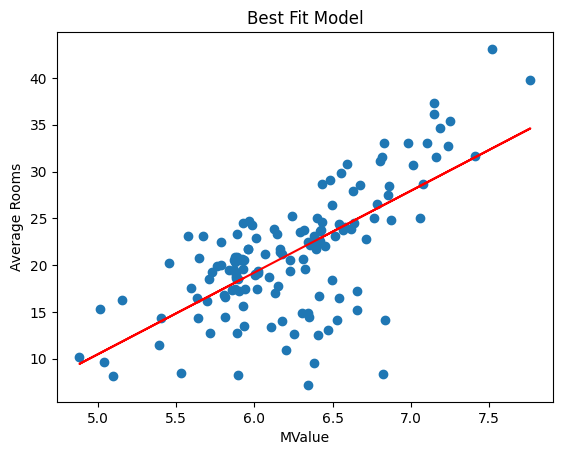

In [ ]:
#plotting testing dataframe
fig,ax=plt.subplots()
ax.scatter(x='Avg_rooms ',y='MValue',data=Testing)
ax.plot(Testing['Avg_rooms '],Testing['best'],color='red')
ax.set_ylabel('Average Rooms')
ax.set_xlabel('MValue')
ax.set_title("Best Fit Model")

In [ ]:
#calculating SST,SSE and SSR for testing dataframe
SST1=sum((Testing['mean']-Testing['MValue'])**2)
SSE1=sum(Testing['error']**2)
SSR1=SST1-SSE1

In [ ]:
#Finding the R2 score for testing dataframe
RSQ1=SSR1/SST1
RSQ1

0.47575009091046516

In [ ]:
#Finding the mean square error for testing dataframe
MSE1=SSE1/len(Testing)
MSE1

23.803993119759824

We see that the R2 score of the testing data is better than that of training data. Also the mean square error of testing data is lower compared to training data.
Having a R2 score of 0.475 tells us that 47.5% of the changeability of the dependent output attribute can be explained by the model while the remaining 52.5% of the variability is still unaccounted for.

In [ ]:
#assigning X & Y values for simple linear regression via sklearn
X=data[['Avg_rooms ']]
Y=data['MValue']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=2)

In [ ]:
#fitting model using sklearn
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#finding the intercept and coefficient
print('Intercept:',model.intercept_,'Coefficient:',model.coef_)

Intercept: -33.10380019799918 Coefficient: [8.72021137]


In [ ]:
#predicitng values using sklearn's model
best_fit=model.intercept_+model.coef_*data['Avg_rooms ']
data['best']=best_fit

Text(0.5, 1.0, 'Best Fit Model')

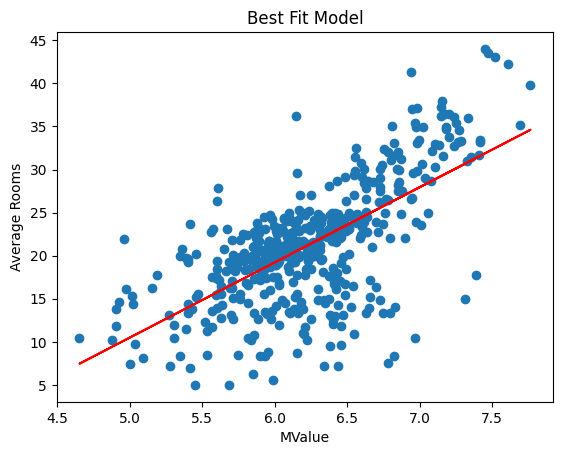

In [ ]:
#plotting the same
fig,ax=plt.subplots()
ax.scatter(x='Avg_rooms ',y='MValue',data=data)
ax.plot(data['Avg_rooms '],data['best'],color='red')
ax.set_ylabel('Average Rooms')
ax.set_xlabel('MValue')
ax.set_title("Best Fit Model")

In [ ]:
#calculating the R2 score using sklearn model
RSQ2=model.score(x_test,y_test)
RSQ2

0.4757500909104647

We see that the coefficient and intercept is same for our model and sklearn's model. Also the R2 score is same.